In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_regression, chi2, SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# ANOVA F-value For Feature Selection Data Pure

In [192]:
def anovaF(X,y,umbral):
    f_value = SelectKBest(f_classif)
    X_best = f_value.fit(X,y)
    fig, ax = plt.subplots(figsize = (20,10))
    scores = X_best.scores_
    ax = plt.rcParams["figure.figsize"] = [24,18]
    ax = plt.plot(scores)
    plt.xticks(np.arange(36),np.arange(36), size = 15 )
    plt.yticks(size = 15)
    bestScore = lambda x: x >= umbral
    bestScore = pd.Series(bestScore(scores))
    return bestScore[bestScore].index


# ExtraTreesClassifier Data Pure

In [193]:
def treesClassifierData(X,y):
    clf = ExtraTreesClassifier(n_estimators = 36)
    clf = clf.fit(X,y)
    model = SelectFromModel(clf, prefit=True)
    best_features_segundo_metodo = X[X.columns[model.get_support(indices = True)]].columns
    return best_features_segundo_metodo

# LDA Data Pure

In [194]:
def ldaData(X,y):
    lda = LinearDiscriminantAnalysis(n_components=None)
    X_lda = lda.fit(X, y)
    X_lda
    model = SelectFromModel(X_lda, prefit=True)
    best_features_tercer_metodo = X[X.columns[model.get_support(indices = True)]].columns
    return best_features_tercer_metodo

# Load Data

### Data Pure

In [195]:
data_i = pd.read_csv('data_i.csv')
data_i.head(1)

,Netflows,p1_d,p2_d,p3_d,duration,max_d,min_d,#packets,Avg_bps,Avg_pps,...,First_Protocol_TCP,First_Protocol_UDP,Type_mine,Type_not_mine,Cryptocurrency_Bitcash,Cryptocurrency_Bitcoin,Cryptocurrency_Does not have,Cryptocurrency_Etherium,Cryptocurrency_Litecoin,Cryptocurrency_Monero
0,1.575318,-0.700949,-0.804477,-0.909496,0.054551,-0.864733,-0.625504,0.570941,1.236305,1.285332,...,1,0,0,1,0,0,1,0,0,0


Anova, chi2, forward selection, backward selection, Recursive Feature Elimination, Lasso, Ridge

In [196]:
temp = data_i.select_dtypes(['float64'])
y = data_i['Type_mine']
X = temp

### Select Feature


Index(['p1_d', 'p2_d', 'min_d', 'second_sp', 'second_dp'], dtype='object')

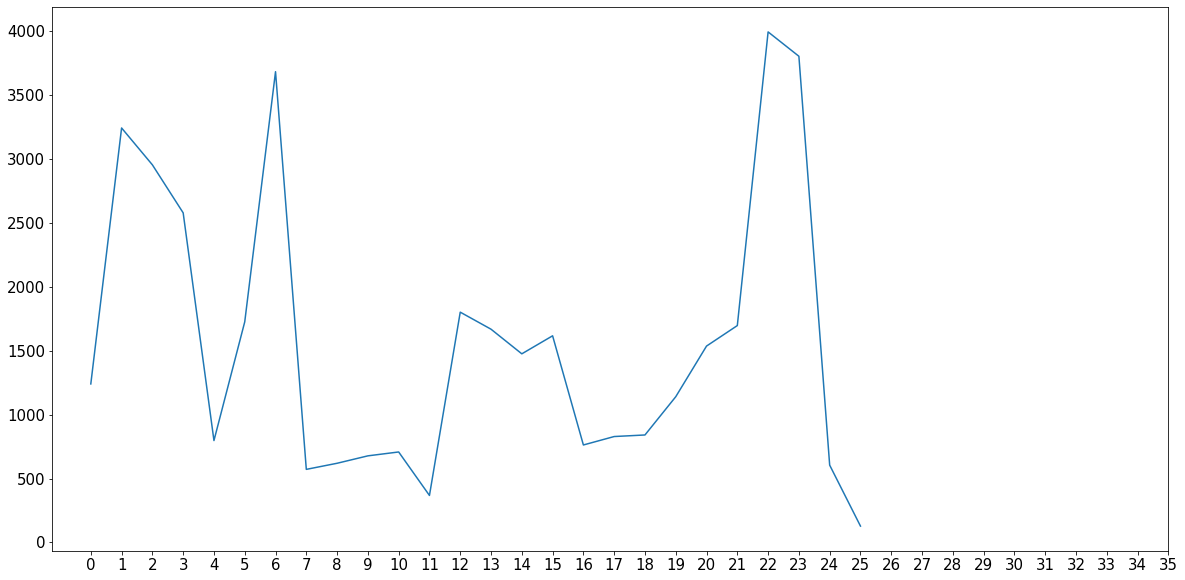

In [197]:
bestF1Me = anovaF(X,y,2700)
bestF1Me = temp.columns[bestF1Me]
bestF1Me

In [198]:
bestF2Me = treesClassifierData(X,y)
bestF2Me

Index(['p1_d', 'p2_d', 'min_d', 'Avg_bpp', 'first_sp', 'first_dp', 'p2_ib',
       'second_sp', 'second_dp'],
      dtype='object')

In [199]:
bestF3Me = ldaData(X,y)
bestF3Me

Index(['#sp', '#dp', 'first_sp', 'first_dp', 'p1_ip', 'p2_ip', 'p3_ib',
       'second_sp', 'second_dp'],
      dtype='object')

In [200]:
best_pure = np.concatenate([bestF1Me,bestF2Me,bestF3Me])
best_pure = np.unique(best_pure)
best_pure

array(['#dp', '#sp', 'Avg_bpp', 'first_dp', 'first_sp', 'min_d', 'p1_d',
       'p1_ip', 'p2_d', 'p2_ib', 'p2_ip', 'p3_ib', 'second_dp',
       'second_sp'], dtype=object)

### Data No Pure

In [201]:
data_n = pd.read_csv('data_n.csv')
data_n.head(1)

,Netflows,p1_d,p2_d,p3_d,duration,max_d,min_d,#packets,Avg_bps,Avg_pps,...,p2_ib,p3_ib,First_Protocol_ICMP,First_Protocol_ICMP6,First_Protocol_TCP,First_Protocol_UDP,Type_mine,Type_not_mine,Cryptocurrency_Does not have,Cryptocurrency_Unidentified
0,-0.06827,-0.113543,-0.010393,7.217647,0.625656,1.820783,-0.019289,-0.105903,-0.119549,-0.12207,...,1.529355,0.573387,0,0,0,1,1,0,0,1


In [202]:
temp = data_n.select_dtypes(['float64'])
y = data_n['Type_mine']
X = temp

### Select Feature

Index(['p2_d', 'duration', '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp',
       'first_dp', 'p3_ip'],
      dtype='object')

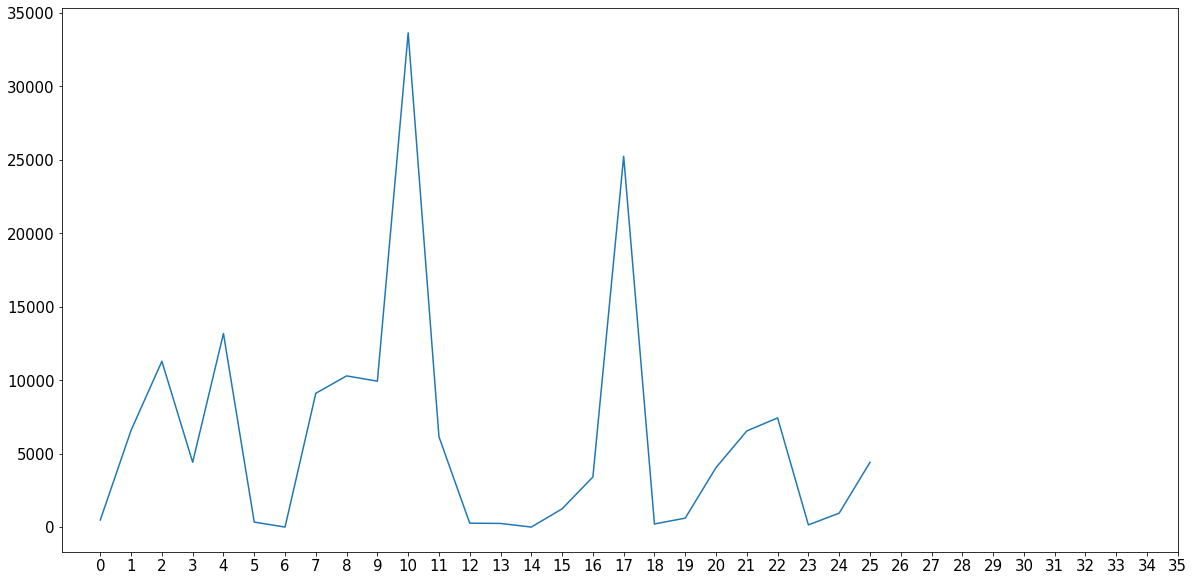

In [203]:
bestF1Me = anovaF(X,y,7000)
bestF1Me = temp.columns[bestF1Me]
bestF1Me

In [204]:
bestF2Me = treesClassifierData(X,y)
bestF2Me

Index(['p2_d', 'p3_d', 'duration', 'Avg_bps', 'Avg_bpp', '#Bytes', 'second_sp',
       'third_sp', 'first_dp', 'second_dp', 'third_dp'],
      dtype='object')

In [205]:
bestF3Me = ldaData(X,y)
bestF3Me

Index(['#packets', 'Avg_bpp', '#Bytes', '#sp', '#dp', 'first_dp', 'p2_ib'], dtype='object')

In [206]:
best_n_pure = np.concatenate([bestF1Me,bestF2Me,bestF3Me])
best_n_pure = np.unique(best_n_pure)
best_n_pure

array(['#Bytes', '#dp', '#packets', '#sp', 'Avg_bpp', 'Avg_bps',
       'Avg_pps', 'duration', 'first_dp', 'p2_d', 'p2_ib', 'p3_d',
       'p3_ip', 'second_dp', 'second_sp', 'third_dp', 'third_sp'],
      dtype=object)

In [235]:
best_pure

array(['#dp', '#sp', 'Avg_bpp', 'first_dp', 'first_sp', 'min_d', 'p1_d',
       'p1_ip', 'p2_d', 'p2_ib', 'p2_ip', 'p3_ib', 'second_dp',
       'second_sp'], dtype=object)

In [208]:
best_n_pure

array(['#Bytes', '#dp', '#packets', '#sp', 'Avg_bpp', 'Avg_bps',
       'Avg_pps', 'duration', 'first_dp', 'p2_d', 'p2_ib', 'p3_d',
       'p3_ip', 'second_dp', 'second_sp', 'third_dp', 'third_sp'],
      dtype=object)